In [919]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [920]:
data = pd.read_csv("sp500-constituents.csv", parse_dates=True)

In [921]:
data.isnull().sum()

Ticker                    0
Name                      0
Industry                  0
Sub-Industry              0
Headquarters Location     0
Date added               44
dtype: int64

In [922]:
tickers = data["Ticker"][200:260]

## Adj Close

In [923]:
df = pd.DataFrame()
for t in tickers:
    df[t] = yf.download(t, start = "2022-1-1", end="2023-1-1", progress=False)["Adj Close"]

In [924]:
df_vol = pd.DataFrame()
for t in tickers:
    df_vol[t] = yf.download(t, start = "2022-1-1", end="2023-1-1", progress=False)["Volume"]

In [925]:
df

,GILD,GIS,GL,GLW,GM,GNRC,GOOG,GOOGL,GPC,GPN,...,IVZ,J,JBHT,JCI,JKHY,JNJ,JNPR,JPM,K,KDP
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-03,68.757858,64.530769,93.808952,35.783119,60.753689,347.910004,145.074493,144.991501,133.847839,140.166763,...,22.167620,138.242676,199.599091,76.914940,169.181747,165.954803,34.180325,154.391342,62.003201,35.552277
2022-01-04,68.407341,65.135208,96.229767,36.572102,65.292587,332.079987,144.416504,144.399506,136.186523,143.856384,...,23.138464,141.184219,205.354477,77.874557,172.299011,165.509781,33.813007,160.244293,62.607124,36.084938
2022-01-05,68.378929,66.008286,96.279167,36.735668,62.313007,312.089996,137.653503,137.774994,134.827942,144.835678,...,22.548344,137.737564,201.102203,76.604759,170.582535,166.612640,33.117023,157.314713,62.952225,36.044052
2022-01-06,67.820007,65.710854,98.009865,36.879997,62.442120,317.390015,137.550995,137.747498,136.147705,149.623291,...,22.976656,137.549393,199.707870,77.913330,167.307419,166.041855,33.291019,158.986023,63.230217,36.433399
2022-01-07,67.507378,66.281166,99.722733,36.533619,61.846207,316.549988,137.004501,137.016998,134.827942,148.574783,...,23.357380,135.875595,197.888321,76.837395,167.455383,168.286316,33.097694,160.561279,63.843735,36.306862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,83.950569,84.347015,119.685516,31.490892,33.751366,92.190002,89.809998,89.230003,175.585098,96.476936,...,18.198133,120.597855,176.983261,63.711838,176.780121,176.212601,31.444519,129.302628,71.549187,35.962070
2022-12-27,84.208122,84.870422,120.243401,31.639668,33.242550,91.150002,87.930000,87.389999,176.301056,97.434525,...,18.138729,120.867264,177.841446,63.910633,178.335190,176.162949,31.553736,129.755707,72.034904,35.695099
2022-12-28,83.772270,83.705109,119.386650,31.163586,32.454388,96.239998,86.459999,86.019997,174.212784,96.127823,...,17.703081,118.941452,174.089432,62.837170,176.082336,175.398468,31.136726,130.464844,71.093208,35.368805


In [926]:
df_returns = pd.DataFrame()
for t in tickers:
    df[f"{t} daily returns"] = df[t].pct_change()
    df_returns[f"{t} daily returns"] = df[t].pct_change()

/Users/berkatbhatti/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  This is separate from the ipykernel package so we can avoid doing imports until


In [927]:
df

,GILD,GIS,GL,GLW,GM,GNRC,GOOG,GOOGL,GPC,GPN,...,IVZ daily returns,J daily returns,JBHT daily returns,JCI daily returns,JKHY daily returns,JNJ daily returns,JNPR daily returns,JPM daily returns,K daily returns,KDP daily returns
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-03,68.757858,64.530769,93.808952,35.783119,60.753689,347.910004,145.074493,144.991501,133.847839,140.166763,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-04,68.407341,65.135208,96.229767,36.572102,65.292587,332.079987,144.416504,144.399506,136.186523,143.856384,...,0.043796,0.021278,0.028835,0.012476,0.018426,-0.002682,-0.010746,0.037910,0.009740,0.014982
2022-01-05,68.378929,66.008286,96.279167,36.735668,62.313007,312.089996,137.653503,137.774994,134.827942,144.835678,...,-0.025504,-0.024412,-0.020707,-0.016306,-0.009962,0.006663,-0.020583,-0.018282,0.005512,-0.001133
2022-01-06,67.820007,65.710854,98.009865,36.879997,62.442120,317.390015,137.550995,137.747498,136.147705,149.623291,...,0.018995,-0.001366,-0.006933,0.017082,-0.019200,-0.003426,0.005254,0.010624,0.004416,0.010802
2022-01-07,67.507378,66.281166,99.722733,36.533619,61.846207,316.549988,137.004501,137.016998,134.827942,148.574783,...,0.016570,-0.012169,-0.009111,-0.013809,0.000884,0.013517,-0.005807,0.009908,0.009703,-0.003473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,83.950569,84.347015,119.685516,31.490892,33.751366,92.190002,89.809998,89.230003,175.585098,96.476936,...,0.006021,0.008175,0.005214,-0.000468,0.003792,0.002542,0.008920,0.004745,0.007116,0.002204
2022-12-27,84.208122,84.870422,120.243401,31.639668,33.242550,91.150002,87.930000,87.389999,176.301056,97.434525,...,-0.003264,0.002234,0.004849,0.003120,0.008797,-0.000282,0.003473,0.003504,0.006789,-0.007424
2022-12-28,83.772270,83.705109,119.386650,31.163586,32.454388,96.239998,86.459999,86.019997,174.212784,96.127823,...,-0.024018,-0.015933,-0.021098,-0.016796,-0.012633,-0.004340,-0.013216,0.005465,-0.013073,-0.009141


## Normal Daily Returns

In [928]:
for t in tickers:
    df[f"{t} normal returns"] = df[t]/df.iloc[0][t]

/Users/berkatbhatti/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  


In [929]:
df

,GILD,GIS,GL,GLW,GM,GNRC,GOOG,GOOGL,GPC,GPN,...,IVZ normal returns,J normal returns,JBHT normal returns,JCI normal returns,JKHY normal returns,JNJ normal returns,JNPR normal returns,JPM normal returns,K normal returns,KDP normal returns
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-03,68.757858,64.530769,93.808952,35.783119,60.753689,347.910004,145.074493,144.991501,133.847839,140.166763,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2022-01-04,68.407341,65.135208,96.229767,36.572102,65.292587,332.079987,144.416504,144.399506,136.186523,143.856384,...,1.043796,1.021278,1.028835,1.012476,1.018426,0.997318,0.989254,1.037910,1.009740,1.014982
2022-01-05,68.378929,66.008286,96.279167,36.735668,62.313007,312.089996,137.653503,137.774994,134.827942,144.835678,...,1.017175,0.996346,1.007531,0.995967,1.008280,1.003964,0.968891,1.018935,1.015306,1.013832
2022-01-06,67.820007,65.710854,98.009865,36.879997,62.442120,317.390015,137.550995,137.747498,136.147705,149.623291,...,1.036496,0.994985,1.000545,1.012980,0.988921,1.000525,0.973982,1.029760,1.019790,1.024784
2022-01-07,67.507378,66.281166,99.722733,36.533619,61.846207,316.549988,137.004501,137.016998,134.827942,148.574783,...,1.053671,0.982877,0.991429,0.998992,0.989796,1.014049,0.968326,1.039963,1.029685,1.021225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,83.950569,84.347015,119.685516,31.490892,33.751366,92.190002,89.809998,89.230003,175.585098,96.476936,...,0.820933,0.872363,0.886694,0.828342,1.044912,1.061811,0.919960,0.837499,1.153960,1.011527
2022-12-27,84.208122,84.870422,120.243401,31.639668,33.242550,91.150002,87.930000,87.389999,176.301056,97.434525,...,0.818253,0.874312,0.890993,0.830926,1.054104,1.061512,0.923155,0.840434,1.161793,1.004017
2022-12-28,83.772270,83.705109,119.386650,31.163586,32.454388,96.239998,86.459999,86.019997,174.212784,96.127823,...,0.798601,0.860382,0.872196,0.816970,1.040788,1.056905,0.910955,0.845027,1.146605,0.994839


## Allocation
- Random  Weights

In [930]:
weights = np.array(np.random.random(len(tickers)))
weights = weights/weights.sum()

In [931]:
weights.sum()

1.0000000000000002

In [932]:
for t, weight in zip(tickers, weights):
    df[f"{t} allocations"] = df[f"{t} normal returns"] * weight

/Users/berkatbhatti/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  


In [933]:
df

,GILD,GIS,GL,GLW,GM,GNRC,GOOG,GOOGL,GPC,GPN,...,IVZ allocations,J allocations,JBHT allocations,JCI allocations,JKHY allocations,JNJ allocations,JNPR allocations,JPM allocations,K allocations,KDP allocations
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-03,68.757858,64.530769,93.808952,35.783119,60.753689,347.910004,145.074493,144.991501,133.847839,140.166763,...,0.003237,0.011952,0.011632,0.015291,0.029997,0.014649,0.013937,0.014088,0.027400,0.000405
2022-01-04,68.407341,65.135208,96.229767,36.572102,65.292587,332.079987,144.416504,144.399506,136.186523,143.856384,...,0.003379,0.012206,0.011968,0.015481,0.030550,0.014610,0.013787,0.014623,0.027667,0.000411
2022-01-05,68.378929,66.008286,96.279167,36.735668,62.313007,312.089996,137.653503,137.774994,134.827942,144.835678,...,0.003293,0.011908,0.011720,0.015229,0.030246,0.014707,0.013503,0.014355,0.027819,0.000410
2022-01-06,67.820007,65.710854,98.009865,36.879997,62.442120,317.390015,137.550995,137.747498,136.147705,149.623291,...,0.003356,0.011892,0.011639,0.015489,0.029665,0.014657,0.013574,0.014508,0.027942,0.000415
2022-01-07,67.507378,66.281166,99.722733,36.533619,61.846207,316.549988,137.004501,137.016998,134.827942,148.574783,...,0.003411,0.011747,0.011533,0.015275,0.029691,0.014855,0.013495,0.014651,0.028213,0.000413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,83.950569,84.347015,119.685516,31.490892,33.751366,92.190002,89.809998,89.230003,175.585098,96.476936,...,0.002658,0.010426,0.010314,0.012666,0.031345,0.015555,0.012821,0.011799,0.031618,0.000409
2022-12-27,84.208122,84.870422,120.243401,31.639668,33.242550,91.150002,87.930000,87.389999,176.301056,97.434525,...,0.002649,0.010449,0.010364,0.012705,0.031620,0.015550,0.012866,0.011840,0.031833,0.000406
2022-12-28,83.772270,83.705109,119.386650,31.163586,32.454388,96.239998,86.459999,86.019997,174.212784,96.127823,...,0.002585,0.010283,0.010146,0.012492,0.031221,0.015483,0.012696,0.011905,0.031417,0.000403


## Position 
- investing 100000

In [934]:
for t in tickers:
    df[f"{t} position"] = df[f"{t} allocations"] * 100000

/Users/berkatbhatti/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  


## Total Position

In [935]:
positionColumns = [x for x in df.columns if "position" in x]

In [936]:
df["total position"] = df[positionColumns].sum(axis=1)

<AxesSubplot:xlabel='Date'>

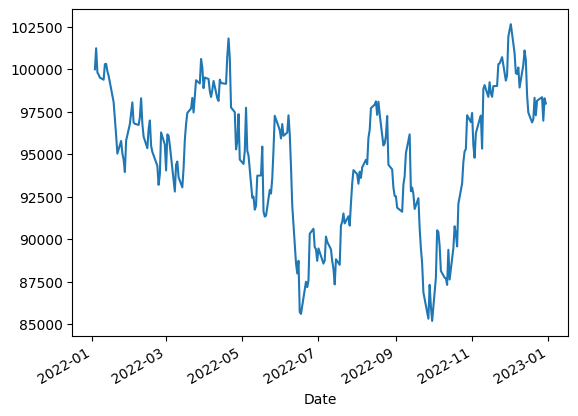

In [937]:
df["total position"].plot()

### Portfolio Daily Return

In [938]:
df["portfolio Daily return"] = df["total position"].pct_change()

In [939]:
df

,GILD,GIS,GL,GLW,GM,GNRC,GOOG,GOOGL,GPC,GPN,...,JBHT position,JCI position,JKHY position,JNJ position,JNPR position,JPM position,K position,KDP position,total position,portfolio Daily return
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-03,68.757858,64.530769,93.808952,35.783119,60.753689,347.910004,145.074493,144.991501,133.847839,140.166763,...,1163.230222,1529.062006,2999.735139,1464.910106,1393.664041,1408.843211,2739.968367,40.464343,100000.000000,NaN
2022-01-04,68.407341,65.135208,96.229767,36.572102,65.292587,332.079987,144.416504,144.399506,136.186523,143.856384,...,1196.771654,1548.139117,3055.006857,1460.981819,1378.687098,1462.252232,2766.656217,41.070599,101237.836480,0.012378
2022-01-05,68.378929,66.008286,96.279167,36.735668,62.313007,312.089996,137.653503,137.774994,134.827942,144.835678,...,1171.990112,1522.895642,3024.572281,1470.716940,1350.309143,1435.519386,2781.906465,41.024064,99813.201770,-0.014072
2022-01-06,67.820007,65.710854,98.009865,36.879997,62.442120,317.390015,137.550995,137.747498,136.147705,149.623291,...,1163.864173,1548.909912,2966.501712,1465.678523,1357.403632,1450.770334,2794.191153,41.467205,99683.737956,-0.001297
2022-01-07,67.507378,66.281166,99.722733,36.533619,61.846207,316.549988,137.004501,137.016998,134.827942,148.574783,...,1153.260141,1527.520415,2969.125247,1485.490747,1349.521022,1465.144775,2821.302967,41.323185,99509.822923,-0.001745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,83.950569,84.347015,119.685516,31.490892,33.751366,92.190002,89.809998,89.230003,175.585098,96.476936,...,1031.428938,1266.585537,3134.460712,1555.457355,1282.114669,1179.905081,3161.812723,40.930756,98151.052512,0.008841
2022-12-27,84.208122,84.870422,120.243401,31.639668,33.242550,91.150002,87.930000,87.389999,176.301056,97.434525,...,1036.430296,1270.537570,3162.033397,1555.019068,1286.567856,1184.039494,3183.276959,40.626898,98359.611075,0.002125
2022-12-28,83.772270,83.705109,119.386650,31.163586,32.454388,96.239998,86.459999,86.019997,174.212784,96.127823,...,1014.564183,1249.197215,3122.088405,1548.270873,1269.564771,1190.510471,3141.662692,40.255522,96976.142736,-0.014065


## Total Cumilative Return

In [940]:
totalcumulativeReturn = 100 * (df["total position"][-1]/df["total position"][0] - 1)

In [941]:
totalcumulativeReturn

-2.011131076040762

In [942]:
df["total position"][-1]

97988.86892395922

## Calculate Sharp

In [943]:
expectedReturn = np.sum((df_returns.mean() * weights) * 252)

In [944]:
expectedReturn

-0.0033944962042237836

In [945]:
expectedVol = np.sqrt(np.dot(weights.T, np.dot(df_returns.cov() * 252, weights)))

In [946]:
expectedVol

0.2136796095508429

In [947]:
sharp = expectedReturn/ expectedVol

In [948]:
sharp

-0.015885915419627805

## Monte Carlo Simulation 
- Sharp Ratio

In [949]:
numOfPortfolios = 5000
allreturns = np.zeros(numOfPortfolios)
allVol = np.zeros(numOfPortfolios)
allSharp = np.zeros(numOfPortfolios)
all_weights = np.zeros((numOfPortfolios, len(tickers)))

for x in range(numOfPortfolios):
    weights = np.array(np.random.random(len(tickers)))
    weights = weights/weights.sum()
    
    all_weights[x,:] = weights
    
    allreturns[x] = np.sum( (df_returns.mean() * weights) * 252)
    
    allVol[x] = np.sqrt(np.dot(weights.T, np.dot(df_returns.cov() * 252, weights)))
    
    allSharp[x] = allreturns[x]/ allVol[x]

In [950]:
allSharp.max()

0.11941336527272702

In [951]:
highestSharpIndex = allSharp.argmax()

In [952]:
hightsReturnIndex = allreturns.argmax()

In [953]:
lowestVolInde = allVol.argmin()

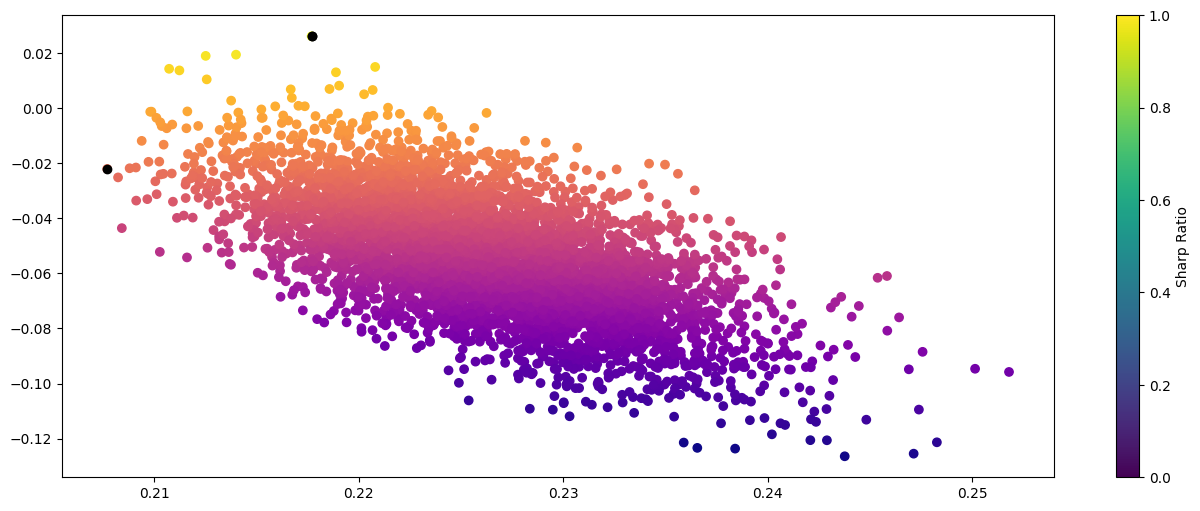

In [954]:
plt.figure(figsize=(16,6))
plt.scatter(allVol, allreturns, c = allSharp, cmap="plasma")
plt.scatter(allVol[highestSharpIndex], allreturns[highestSharpIndex], c = "black")
plt.scatter(allVol[lowestVolInde], allreturns[lowestVolInde], c = "black")
plt.scatter(allVol[hightsReturnIndex], allreturns[hightsReturnIndex], c = "black", marker="o")
plt.colorbar(label = "Sharp Ratio")

## Calculating the Daily Sharp

In [955]:
df_returns.columns

Index(['GILD daily returns', 'GIS daily returns', 'GL daily returns',
       'GLW daily returns', 'GM daily returns', 'GNRC daily returns',
       'GOOG daily returns', 'GOOGL daily returns', 'GPC daily returns',
       'GPN daily returns', 'GRMN daily returns', 'GS daily returns',
       'GWW daily returns', 'HAL daily returns', 'HAS daily returns',
       'HBAN daily returns', 'HCA daily returns', 'HD daily returns',
       'HES daily returns', 'HIG daily returns', 'HII daily returns',
       'HLT daily returns', 'HOLX daily returns', 'HON daily returns',
       'HPE daily returns', 'HPQ daily returns', 'HRL daily returns',
       'HSIC daily returns', 'HST daily returns', 'HSY daily returns',
       'HUM daily returns', 'HWM daily returns', 'IBM daily returns',
       'ICE daily returns', 'IDXX daily returns', 'IEX daily returns',
       'IFF daily returns', 'ILMN daily returns', 'INCY daily returns',
       'INTC daily returns', 'INTU daily returns', 'INVH daily returns',
       'I

In [956]:
allocationColumns = [x for x in df.columns if "allocation" in x]

In [957]:
df

,GILD,GIS,GL,GLW,GM,GNRC,GOOG,GOOGL,GPC,GPN,...,JBHT position,JCI position,JKHY position,JNJ position,JNPR position,JPM position,K position,KDP position,total position,portfolio Daily return
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-03,68.757858,64.530769,93.808952,35.783119,60.753689,347.910004,145.074493,144.991501,133.847839,140.166763,...,1163.230222,1529.062006,2999.735139,1464.910106,1393.664041,1408.843211,2739.968367,40.464343,100000.000000,NaN
2022-01-04,68.407341,65.135208,96.229767,36.572102,65.292587,332.079987,144.416504,144.399506,136.186523,143.856384,...,1196.771654,1548.139117,3055.006857,1460.981819,1378.687098,1462.252232,2766.656217,41.070599,101237.836480,0.012378
2022-01-05,68.378929,66.008286,96.279167,36.735668,62.313007,312.089996,137.653503,137.774994,134.827942,144.835678,...,1171.990112,1522.895642,3024.572281,1470.716940,1350.309143,1435.519386,2781.906465,41.024064,99813.201770,-0.014072
2022-01-06,67.820007,65.710854,98.009865,36.879997,62.442120,317.390015,137.550995,137.747498,136.147705,149.623291,...,1163.864173,1548.909912,2966.501712,1465.678523,1357.403632,1450.770334,2794.191153,41.467205,99683.737956,-0.001297
2022-01-07,67.507378,66.281166,99.722733,36.533619,61.846207,316.549988,137.004501,137.016998,134.827942,148.574783,...,1153.260141,1527.520415,2969.125247,1485.490747,1349.521022,1465.144775,2821.302967,41.323185,99509.822923,-0.001745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,83.950569,84.347015,119.685516,31.490892,33.751366,92.190002,89.809998,89.230003,175.585098,96.476936,...,1031.428938,1266.585537,3134.460712,1555.457355,1282.114669,1179.905081,3161.812723,40.930756,98151.052512,0.008841
2022-12-27,84.208122,84.870422,120.243401,31.639668,33.242550,91.150002,87.930000,87.389999,176.301056,97.434525,...,1036.430296,1270.537570,3162.033397,1555.019068,1286.567856,1184.039494,3183.276959,40.626898,98359.611075,0.002125
2022-12-28,83.772270,83.705109,119.386650,31.163586,32.454388,96.239998,86.459999,86.019997,174.212784,96.127823,...,1014.564183,1249.197215,3122.088405,1548.270873,1269.564771,1190.510471,3141.662692,40.255522,96976.142736,-0.014065


In [958]:
expReturns = []
for index in df.index:
    expReturns.append((np.sum(df_returns.loc[index].mean() * df[allocationColumns].loc[index]) * 252))

In [959]:
df["expectedDailReturn"] = expReturns

<AxesSubplot:ylabel='Frequency'>

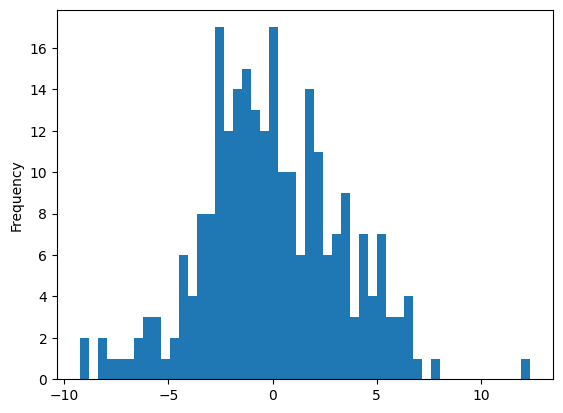

In [960]:
df["expectedDailReturn"].plot(kind = "hist", bins = 50)

In [961]:
df

,GILD,GIS,GL,GLW,GM,GNRC,GOOG,GOOGL,GPC,GPN,...,JCI position,JKHY position,JNJ position,JNPR position,JPM position,K position,KDP position,total position,portfolio Daily return,expectedDailReturn
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-03,68.757858,64.530769,93.808952,35.783119,60.753689,347.910004,145.074493,144.991501,133.847839,140.166763,...,1529.062006,2999.735139,1464.910106,1393.664041,1408.843211,2739.968367,40.464343,100000.000000,NaN,0.000000
2022-01-04,68.407341,65.135208,96.229767,36.572102,65.292587,332.079987,144.416504,144.399506,136.186523,143.856384,...,1548.139117,3055.006857,1460.981819,1378.687098,1462.252232,2766.656217,41.070599,101237.836480,0.012378,2.934136
2022-01-05,68.378929,66.008286,96.279167,36.735668,62.313007,312.089996,137.653503,137.774994,134.827942,144.835678,...,1522.895642,3024.572281,1470.716940,1350.309143,1435.519386,2781.906465,41.024064,99813.201770,-0.014072,-3.591943
2022-01-06,67.820007,65.710854,98.009865,36.879997,62.442120,317.390015,137.550995,137.747498,136.147705,149.623291,...,1548.909912,2966.501712,1465.678523,1357.403632,1450.770334,2794.191153,41.467205,99683.737956,-0.001297,0.038322
2022-01-07,67.507378,66.281166,99.722733,36.533619,61.846207,316.549988,137.004501,137.016998,134.827942,148.574783,...,1527.520415,2969.125247,1485.490747,1349.521022,1465.144775,2821.302967,41.323185,99509.822923,-0.001745,-0.679945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,83.950569,84.347015,119.685516,31.490892,33.751366,92.190002,89.809998,89.230003,175.585098,96.476936,...,1266.585537,3134.460712,1555.457355,1282.114669,1179.905081,3161.812723,40.930756,98151.052512,0.008841,1.705489
2022-12-27,84.208122,84.870422,120.243401,31.639668,33.242550,91.150002,87.930000,87.389999,176.301056,97.434525,...,1270.537570,3162.033397,1555.019068,1286.567856,1184.039494,3183.276959,40.626898,98359.611075,0.002125,0.073516
2022-12-28,83.772270,83.705109,119.386650,31.163586,32.454388,96.239998,86.459999,86.019997,174.212784,96.127823,...,1249.197215,3122.088405,1548.270873,1269.564771,1190.510471,3141.662692,40.255522,96976.142736,-0.014065,-2.919784


In [962]:
df["portDailyReturn"] = df_returns.mean(axis=1) 

In [963]:
df["dailySTD"] = df_returns.std(axis=1)

In [964]:
df["daily Sharp"] = (df["portDailyReturn"] / df["dailySTD"]) 

In [965]:
df

,GILD,GIS,GL,GLW,GM,GNRC,GOOG,GOOGL,GPC,GPN,...,JNPR position,JPM position,K position,KDP position,total position,portfolio Daily return,expectedDailReturn,portDailyReturn,dailySTD,daily Sharp
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-03,68.757858,64.530769,93.808952,35.783119,60.753689,347.910004,145.074493,144.991501,133.847839,140.166763,...,1393.664041,1408.843211,2739.968367,40.464343,100000.000000,NaN,0.000000,NaN,NaN,NaN
2022-01-04,68.407341,65.135208,96.229767,36.572102,65.292587,332.079987,144.416504,144.399506,136.186523,143.856384,...,1378.687098,1462.252232,2766.656217,41.070599,101237.836480,0.012378,2.934136,0.011501,0.023599,0.487358
2022-01-05,68.378929,66.008286,96.279167,36.735668,62.313007,312.089996,137.653503,137.774994,134.827942,144.835678,...,1350.309143,1435.519386,2781.906465,41.024064,99813.201770,-0.014072,-3.591943,-0.014280,0.018378,-0.777059
2022-01-06,67.820007,65.710854,98.009865,36.879997,62.442120,317.390015,137.550995,137.747498,136.147705,149.623291,...,1357.403632,1450.770334,2794.191153,41.467205,99683.737956,-0.001297,0.038322,0.000153,0.029706,0.005135
2022-01-07,67.507378,66.281166,99.722733,36.533619,61.846207,316.549988,137.004501,137.016998,134.827942,148.574783,...,1349.521022,1465.144775,2821.302967,41.323185,99509.822923,-0.001745,-0.679945,-0.002711,0.015377,-0.176331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,83.950569,84.347015,119.685516,31.490892,33.751366,92.190002,89.809998,89.230003,175.585098,96.476936,...,1282.114669,1179.905081,3161.812723,40.930756,98151.052512,0.008841,1.705489,0.006895,0.010134,0.680389
2022-12-27,84.208122,84.870422,120.243401,31.639668,33.242550,91.150002,87.930000,87.389999,176.301056,97.434525,...,1286.567856,1184.039494,3183.276959,40.626898,98359.611075,0.002125,0.073516,0.000297,0.008196,0.036186
2022-12-28,83.772270,83.705109,119.386650,31.163586,32.454388,96.239998,86.459999,86.019997,174.212784,96.127823,...,1269.564771,1190.510471,3141.662692,40.255522,96976.142736,-0.014065,-2.919784,-0.011948,0.011988,-0.996639


<AxesSubplot:ylabel='Frequency'>

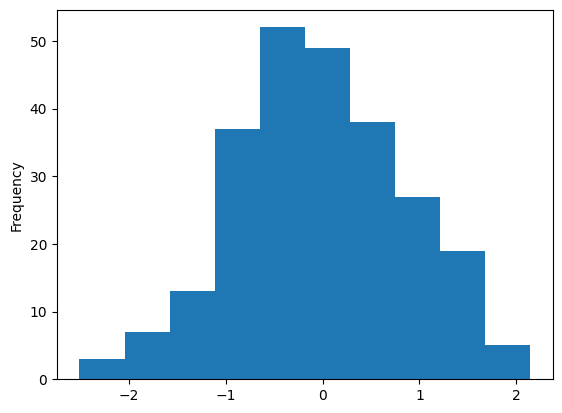

In [966]:
df["daily Sharp"].plot(kind = "hist")

<AxesSubplot:xlabel='Date'>

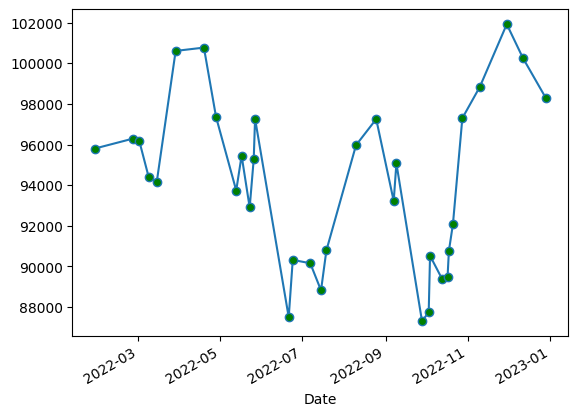

In [967]:
df[df["daily Sharp"] > 1.0]["total position"].plot(marker = "o", mfc = "g")

In [968]:
df[df["daily Sharp"] > 1.0]["total position"]

Date
2022-01-28     95802.569126
2022-02-25     96285.560827
2022-03-02     96169.207844
2022-03-09     94389.122930
2022-03-15     94175.693537
2022-03-29    100606.709051
2022-04-19    100769.987737
2022-04-28     97359.344708
2022-05-13     93735.446607
2022-05-17     95453.192900
2022-05-23     92901.964518
2022-05-26     95275.003070
2022-05-27     97267.777753
2022-06-21     87498.788889
2022-06-24     90320.507104
2022-07-07     90157.198150
2022-07-15     88821.132260
2022-07-19     90789.213872
2022-08-10     95966.415914
2022-08-25     97251.500907
2022-09-07     93219.415932
2022-09-09     95069.873874
2022-09-28     87316.163125
2022-10-03     87732.350456
2022-10-04     90524.241201
2022-10-13     89377.057789
2022-10-17     89472.025060
2022-10-18     90761.615886
2022-10-21     92079.905431
2022-10-28     97297.704825
2022-11-10     98839.563818
2022-11-30    101920.518055
2022-12-12    100257.970982
2022-12-29     98291.441426
Name: total position, dtype: float64

In [969]:
df[df["daily Sharp"] > 1.0]["total position"].pct_change() * 252

Date
2022-01-28          NaN
2022-02-25     1.270466
2022-03-02    -0.304521
2022-03-09    -4.664501
2022-03-15    -0.569814
2022-03-29    17.208431
2022-04-19     0.408981
2022-04-28    -8.529147
2022-05-13    -9.379914
2022-05-17     4.618019
2022-05-23    -6.735338
2022-05-26     6.436954
2022-05-27     5.270839
2022-06-21   -25.309360
2022-06-24     8.126661
2022-07-07    -0.455642
2022-07-15    -3.734462
2022-07-19     5.583768
2022-08-10    14.370153
2022-08-25     3.374529
2022-09-07   -10.448018
2022-09-09     5.002342
2022-09-28   -20.552621
2022-10-03     1.201143
2022-10-04     8.019350
2022-10-13    -3.193512
2022-10-17     0.267762
2022-10-18     3.632162
2022-10-21     3.660236
2022-10-28    14.279831
2022-11-10     3.993398
2022-11-30     7.855159
2022-12-12    -4.110672
2022-12-29    -4.942903
Name: total position, dtype: float64

In [970]:
df_volDailyChange = pd.DataFrame()
for t in tickers:
    df_volDailyChange[f"{t} volume daily return"] = df_vol[t].pct_change()

In [971]:
df_volDailyChange

,GILD volume daily return,GIS volume daily return,GL volume daily return,GLW volume daily return,GM volume daily return,GNRC volume daily return,GOOG volume daily return,GOOGL volume daily return,GPC volume daily return,GPN volume daily return,...,IVZ volume daily return,J volume daily return,JBHT volume daily return,JCI volume daily return,JKHY volume daily return,JNJ volume daily return,JNPR volume daily return,JPM volume daily return,K volume daily return,KDP volume daily return
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-04,0.024402,0.160890,0.144279,0.780874,1.130166,1.848453,-0.090664,-0.008588,0.412877,0.297623,...,-0.037188,0.251946,0.408637,-0.182667,0.519598,0.122451,-0.039584,0.539208,0.318152,0.512041
2022-01-05,0.149674,0.116656,0.578261,0.093078,-0.024895,-0.112677,1.165126,0.923169,0.164662,0.268381,...,-0.091380,-0.157731,-0.157339,0.000884,0.128710,0.039669,-0.087536,-0.131532,0.249157,0.088925
2022-01-06,-0.055298,-0.150947,-0.390025,-0.202727,-0.526124,-0.214860,-0.414810,-0.316196,-0.308945,-0.112316,...,-0.214015,-0.283026,-0.150335,-0.006420,-0.390446,0.040692,0.244726,-0.199089,-0.265874,0.125939
2022-01-07,-0.033740,0.125849,0.408129,-0.227691,-0.170201,-0.106042,-0.331910,-0.203170,-0.051989,-0.398681,...,0.535576,0.320638,0.055948,-0.056509,-0.214959,-0.043223,-0.331576,-0.009553,0.222786,-0.240707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,-0.158211,-0.459939,-0.496343,-0.341719,-0.475024,-0.380149,-0.246917,-0.168315,-0.374269,-0.084488,...,0.059208,-0.133158,-0.161479,-0.587133,-0.169346,-0.354819,-0.204738,-0.411219,-0.259080,-0.352756
2022-12-27,-0.126283,0.365415,0.331559,0.166650,-0.059770,-0.080684,-0.131580,-0.126318,0.415888,0.079356,...,-0.411402,-0.198615,-0.046799,-0.258544,0.266667,-0.167264,-0.184684,0.062668,0.208696,0.213786
2022-12-28,-0.049191,-0.153713,-0.000364,-0.170905,-0.043418,1.835409,0.155692,-0.028566,-0.214338,-0.261914,...,0.748096,-0.004860,-0.322235,0.096913,-0.139898,-0.137548,-0.132896,0.631436,-0.049371,-0.233988


In [972]:
df = pd.concat([df, df_volDailyChange], axis=1)

In [973]:
amcrColumns = [x for x in df.columns if "AMCR" in x]

In [974]:
df = df.drop(amcrColumns, axis=1)

In [975]:
df

,GILD,GIS,GL,GLW,GM,GNRC,GOOG,GOOGL,GPC,GPN,...,IVZ volume daily return,J volume daily return,JBHT volume daily return,JCI volume daily return,JKHY volume daily return,JNJ volume daily return,JNPR volume daily return,JPM volume daily return,K volume daily return,KDP volume daily return
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-03,68.757858,64.530769,93.808952,35.783119,60.753689,347.910004,145.074493,144.991501,133.847839,140.166763,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-04,68.407341,65.135208,96.229767,36.572102,65.292587,332.079987,144.416504,144.399506,136.186523,143.856384,...,-0.037188,0.251946,0.408637,-0.182667,0.519598,0.122451,-0.039584,0.539208,0.318152,0.512041
2022-01-05,68.378929,66.008286,96.279167,36.735668,62.313007,312.089996,137.653503,137.774994,134.827942,144.835678,...,-0.091380,-0.157731,-0.157339,0.000884,0.128710,0.039669,-0.087536,-0.131532,0.249157,0.088925
2022-01-06,67.820007,65.710854,98.009865,36.879997,62.442120,317.390015,137.550995,137.747498,136.147705,149.623291,...,-0.214015,-0.283026,-0.150335,-0.006420,-0.390446,0.040692,0.244726,-0.199089,-0.265874,0.125939
2022-01-07,67.507378,66.281166,99.722733,36.533619,61.846207,316.549988,137.004501,137.016998,134.827942,148.574783,...,0.535576,0.320638,0.055948,-0.056509,-0.214959,-0.043223,-0.331576,-0.009553,0.222786,-0.240707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,83.950569,84.347015,119.685516,31.490892,33.751366,92.190002,89.809998,89.230003,175.585098,96.476936,...,0.059208,-0.133158,-0.161479,-0.587133,-0.169346,-0.354819,-0.204738,-0.411219,-0.259080,-0.352756
2022-12-27,84.208122,84.870422,120.243401,31.639668,33.242550,91.150002,87.930000,87.389999,176.301056,97.434525,...,-0.411402,-0.198615,-0.046799,-0.258544,0.266667,-0.167264,-0.184684,0.062668,0.208696,0.213786
2022-12-28,83.772270,83.705109,119.386650,31.163586,32.454388,96.239998,86.459999,86.019997,174.212784,96.127823,...,0.748096,-0.004860,-0.322235,0.096913,-0.139898,-0.137548,-0.132896,0.631436,-0.049371,-0.233988


In [976]:
df

,GILD,GIS,GL,GLW,GM,GNRC,GOOG,GOOGL,GPC,GPN,...,IVZ volume daily return,J volume daily return,JBHT volume daily return,JCI volume daily return,JKHY volume daily return,JNJ volume daily return,JNPR volume daily return,JPM volume daily return,K volume daily return,KDP volume daily return
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-03,68.757858,64.530769,93.808952,35.783119,60.753689,347.910004,145.074493,144.991501,133.847839,140.166763,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-04,68.407341,65.135208,96.229767,36.572102,65.292587,332.079987,144.416504,144.399506,136.186523,143.856384,...,-0.037188,0.251946,0.408637,-0.182667,0.519598,0.122451,-0.039584,0.539208,0.318152,0.512041
2022-01-05,68.378929,66.008286,96.279167,36.735668,62.313007,312.089996,137.653503,137.774994,134.827942,144.835678,...,-0.091380,-0.157731,-0.157339,0.000884,0.128710,0.039669,-0.087536,-0.131532,0.249157,0.088925
2022-01-06,67.820007,65.710854,98.009865,36.879997,62.442120,317.390015,137.550995,137.747498,136.147705,149.623291,...,-0.214015,-0.283026,-0.150335,-0.006420,-0.390446,0.040692,0.244726,-0.199089,-0.265874,0.125939
2022-01-07,67.507378,66.281166,99.722733,36.533619,61.846207,316.549988,137.004501,137.016998,134.827942,148.574783,...,0.535576,0.320638,0.055948,-0.056509,-0.214959,-0.043223,-0.331576,-0.009553,0.222786,-0.240707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,83.950569,84.347015,119.685516,31.490892,33.751366,92.190002,89.809998,89.230003,175.585098,96.476936,...,0.059208,-0.133158,-0.161479,-0.587133,-0.169346,-0.354819,-0.204738,-0.411219,-0.259080,-0.352756
2022-12-27,84.208122,84.870422,120.243401,31.639668,33.242550,91.150002,87.930000,87.389999,176.301056,97.434525,...,-0.411402,-0.198615,-0.046799,-0.258544,0.266667,-0.167264,-0.184684,0.062668,0.208696,0.213786
2022-12-28,83.772270,83.705109,119.386650,31.163586,32.454388,96.239998,86.459999,86.019997,174.212784,96.127823,...,0.748096,-0.004860,-0.322235,0.096913,-0.139898,-0.137548,-0.132896,0.631436,-0.049371,-0.233988


In [977]:
df= df.drop([x for x in df.columns if "volume" in x], axis=1 )

- df_volDailyChange = df_volDailyChange.drop("AMCR volume daily return", axis=1)

## Porftolio Daily Volume Change

In [978]:
df["portfolioVolumeChange"] = df_volDailyChange.mean(axis=1)

<AxesSubplot:ylabel='Frequency'>

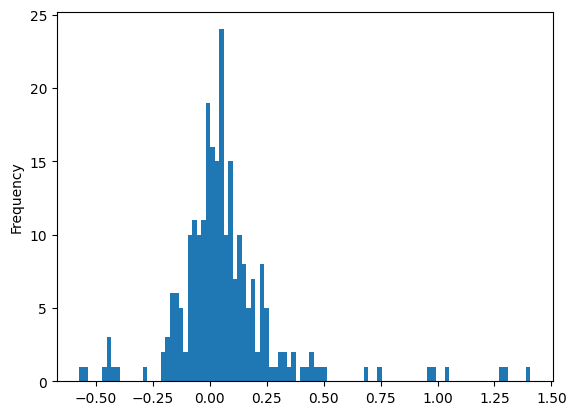

In [979]:
df["portfolioVolumeChange"].plot(kind = "hist", bins = 100)

## Volume Stantard Deviation

In [980]:
df["volumeSTD"] = df_volDailyChange.std(axis=1)

<AxesSubplot:ylabel='Frequency'>

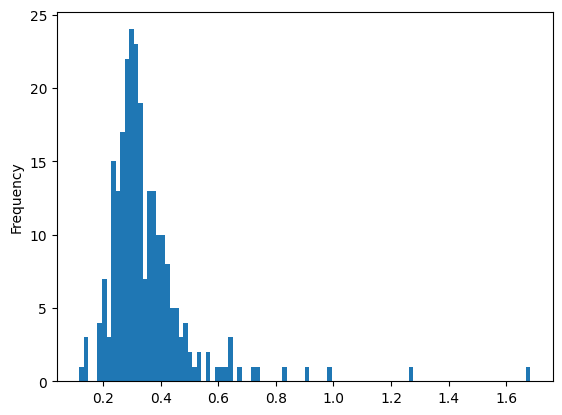

In [981]:
df["volumeSTD"].plot(kind = "hist", bins = 100)

## Vol Sharp

In [982]:
df["volSharp"] = df["portfolioVolumeChange"]/df["volumeSTD"]

In [983]:
df

,GILD,GIS,GL,GLW,GM,GNRC,GOOG,GOOGL,GPC,GPN,...,KDP position,total position,portfolio Daily return,expectedDailReturn,portDailyReturn,dailySTD,daily Sharp,portfolioVolumeChange,volumeSTD,volSharp
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-03,68.757858,64.530769,93.808952,35.783119,60.753689,347.910004,145.074493,144.991501,133.847839,140.166763,...,40.464343,100000.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-04,68.407341,65.135208,96.229767,36.572102,65.292587,332.079987,144.416504,144.399506,136.186523,143.856384,...,41.070599,101237.836480,0.012378,2.934136,0.011501,0.023599,0.487358,0.316448,0.414726,0.763028
2022-01-05,68.378929,66.008286,96.279167,36.735668,62.313007,312.089996,137.653503,137.774994,134.827942,144.835678,...,41.024064,99813.201770,-0.014072,-3.591943,-0.014280,0.018378,-0.777059,0.102419,0.320610,0.319449
2022-01-06,67.820007,65.710854,98.009865,36.879997,62.442120,317.390015,137.550995,137.747498,136.147705,149.623291,...,41.467205,99683.737956,-0.001297,0.038322,0.000153,0.029706,0.005135,0.028012,1.270620,0.022046
2022-01-07,67.507378,66.281166,99.722733,36.533619,61.846207,316.549988,137.004501,137.016998,134.827942,148.574783,...,41.323185,99509.822923,-0.001745,-0.679945,-0.002711,0.015377,-0.176331,0.032976,0.299377,0.110148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,83.950569,84.347015,119.685516,31.490892,33.751366,92.190002,89.809998,89.230003,175.585098,96.476936,...,40.930756,98151.052512,0.008841,1.705489,0.006895,0.010134,0.680389,-0.285436,0.245884,-1.160857
2022-12-27,84.208122,84.870422,120.243401,31.639668,33.242550,91.150002,87.930000,87.389999,176.301056,97.434525,...,40.626898,98359.611075,0.002125,0.073516,0.000297,0.008196,0.036186,0.080705,0.317150,0.254470
2022-12-28,83.772270,83.705109,119.386650,31.163586,32.454388,96.239998,86.459999,86.019997,174.212784,96.127823,...,40.255522,96976.142736,-0.014065,-2.919784,-0.011948,0.011988,-0.996639,0.018685,0.332222,0.056244


<AxesSubplot:ylabel='Frequency'>

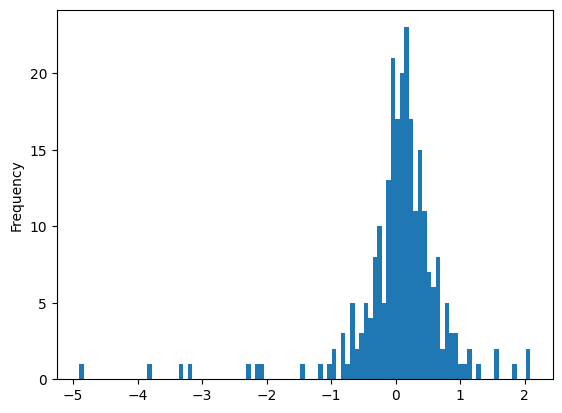

In [984]:
df["volSharp"].plot(kind = "hist", bins = 100)

<AxesSubplot:ylabel='Frequency'>

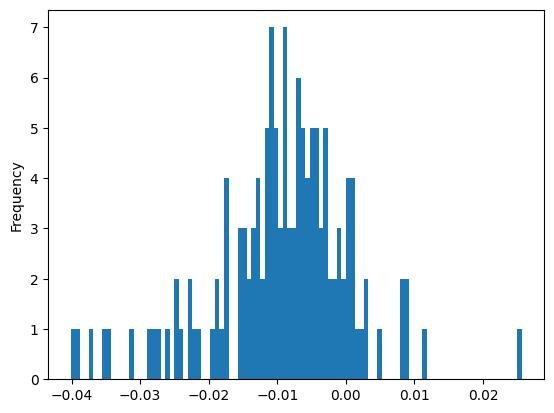

In [985]:
df[df["volSharp"] > df["daily Sharp"]]["portDailyReturn"].plot(kind = "hist", bins = 100)

<AxesSubplot:xlabel='Date'>

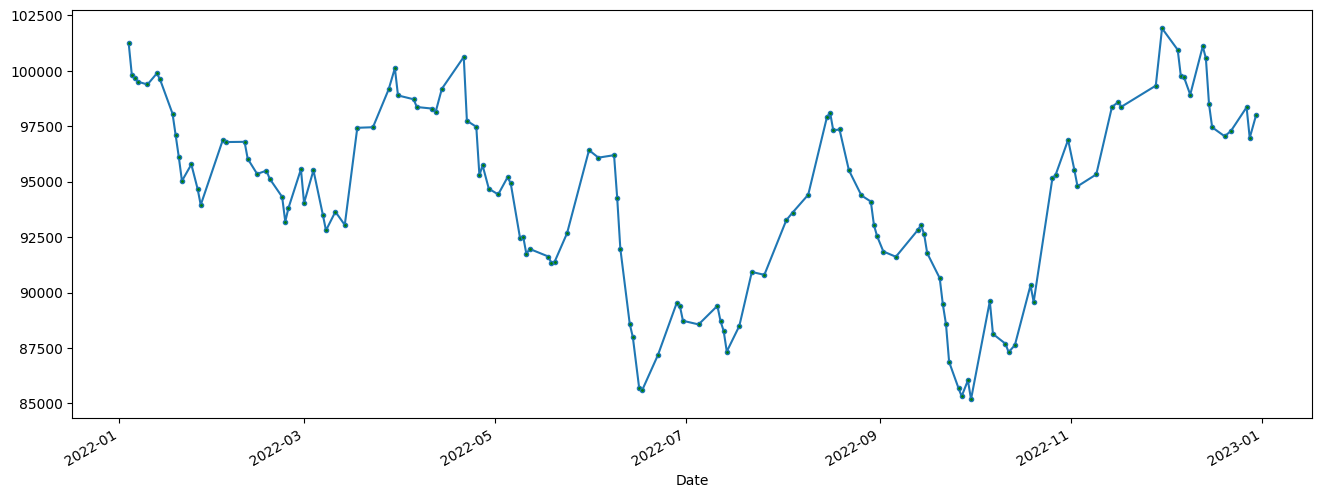

In [986]:
plt.figure(figsize=(16,6))
df[df["volSharp"] > df["daily Sharp"]]["total position"].plot(marker = "o", mfc = "g", ms = 3)

## Total Cumulative return for the year

##### condition =  df[df["volSharp"] > df["daily Sharp"]]

In [987]:
targetConditionDF = df[df["volSharp"] > df["daily Sharp"]]

In [988]:
100 * (targetConditionDF["total position"][-1] / targetConditionDF["total position"][0] -1)

-3.209242383470723

In [989]:
targetConditionDF["total position"][0]

101237.8364803969

In [990]:
targetConditionDF["total position"][-1]

97988.86892395922

In [991]:
df[df["volSharp"] > df["daily Sharp"]]["total position"]

Date
2022-01-04    101237.836480
2022-01-05     99813.201770
2022-01-06     99683.737956
2022-01-07     99509.822923
2022-01-10     99387.815600
                  ...      
2022-12-20     97051.685767
2022-12-22     97290.912416
2022-12-27     98359.611075
2022-12-28     96976.142736
2022-12-30     97988.868924
Name: total position, Length: 136, dtype: float64

In [992]:
df["absSharpAndVol"] = np.abs(df["daily Sharp"] - df["volSharp"])

<AxesSubplot:ylabel='Frequency'>

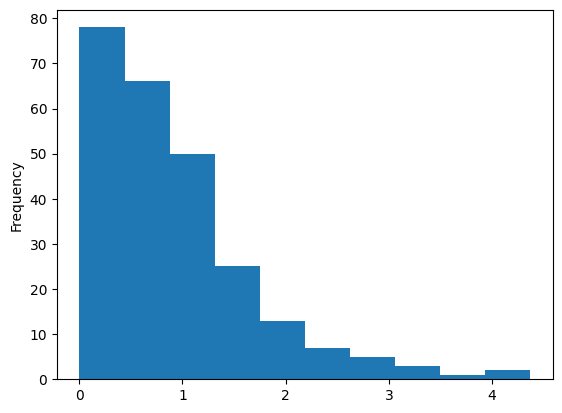

In [993]:
df["absSharpAndVol"].plot(kind = "hist")

<AxesSubplot:xlabel='Date'>

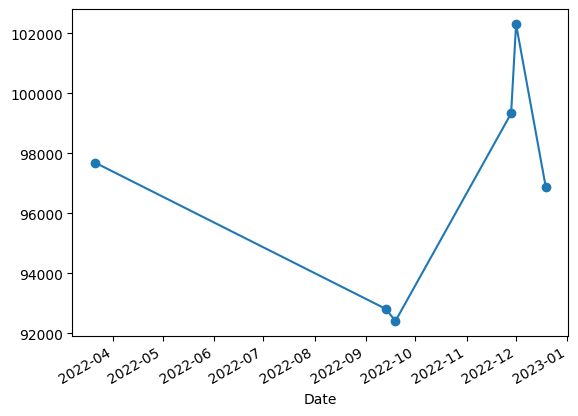

In [994]:
df[df["absSharpAndVol"] > 3]["total position"].plot(marker = "o")

In [995]:
df.corrwith(df["absSharpAndVol"]).sort_values()

volSharp             -0.246690
HST daily returns    -0.218216
HD daily returns     -0.207945
IQV allocations      -0.207497
IQV normal returns   -0.207497
                        ...   
HES normal returns    0.099929
HES                   0.099929
HES position          0.099929
HES allocations       0.099929
absSharpAndVol        1.000000
Length: 310, dtype: float64

In [996]:
df.corrwith(df["volSharp"]).sort_values()

absSharpAndVol          -0.246690
HES daily returns       -0.194151
HAL daily returns       -0.162755
KDP daily returns       -0.148672
GL daily returns        -0.147316
                           ...   
GPN allocations          0.066675
dailySTD                 0.168873
volumeSTD                0.440314
portfolioVolumeChange    0.819937
volSharp                 1.000000
Length: 310, dtype: float64

In [997]:
df["dividedSharpAndVol"] = (df["daily Sharp"]/ df["volSharp"])

In [998]:
df['dividedSharpAndVol']

Date
2022-01-03          NaN
2022-01-04     0.638716
2022-01-05    -2.432495
2022-01-06     0.232942
2022-01-07    -1.600857
                ...    
2022-12-23    -0.586110
2022-12-27     0.142203
2022-12-28   -17.720019
2022-12-29     3.679032
2022-12-30    -1.401485
Name: dividedSharpAndVol, Length: 251, dtype: float64

<AxesSubplot:ylabel='Frequency'>

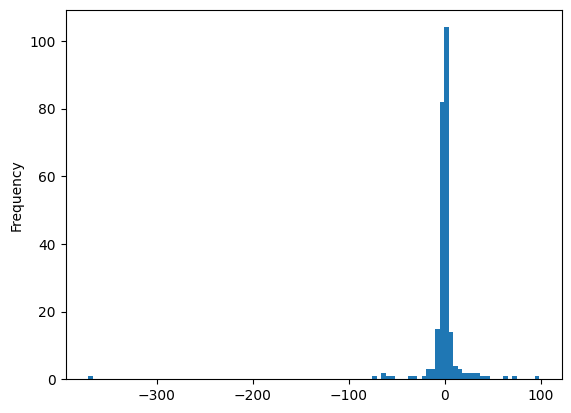

In [999]:
df["dividedSharpAndVol"].plot(kind = "hist", bins = 100)

<AxesSubplot:xlabel='Date'>

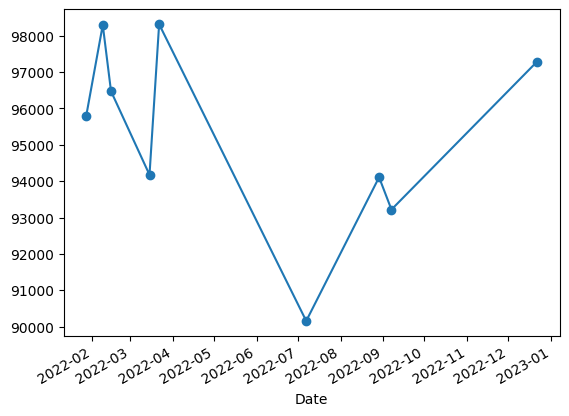

In [1000]:
df[df["dividedSharpAndVol"] < -20]["total position"].plot(marker = "o")

In [1001]:
df[df["dividedSharpAndVol"] > 30]["total position"]

Date
2022-02-14    95355.167850
2022-03-23    97459.552668
2022-04-26    95287.901779
2022-05-27    97267.777753
2022-07-20    91023.505967
2022-08-17    97317.831802
2022-09-02    91854.136192
2022-10-17    89472.025060
Name: total position, dtype: float64

In [1002]:
df[df["dividedSharpAndVol"] < -20]

,GILD,GIS,GL,GLW,GM,GNRC,GOOG,GOOGL,GPC,GPN,...,portfolio Daily return,expectedDailReturn,portDailyReturn,dailySTD,daily Sharp,portfolioVolumeChange,volumeSTD,volSharp,absSharpAndVol,dividedSharpAndVol
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-28,65.233772,67.064117,101.029663,40.526623,49.898079,266.700012,133.289505,133.350998,126.472771,145.735840,...,0.019676,4.804197,0.019900,0.016547,1.202634,-0.012086,0.293511,-0.041178,1.243811,-29.205913
2022-02-09,60.042343,65.894508,105.188080,41.325226,50.374813,294.480011,141.453003,141.591995,128.190399,144.786224,...,0.011537,3.426787,0.013834,0.016040,0.862494,-0.004693,0.351754,-0.013341,0.875834,-64.651132
2022-02-15,58.100300,64.763565,104.495010,40.497761,49.331959,276.700012,136.425507,136.608505,125.191833,142.382523,...,0.011733,3.102011,0.012759,0.018802,0.678607,-0.006852,0.379290,-0.018066,0.696673,-37.561903
2022-03-15,55.953049,61.167740,96.752441,35.442043,41.843273,286.980011,129.660507,129.197998,121.716476,127.358139,...,0.012080,3.707482,0.015622,0.013804,1.131689,-0.005803,0.272013,-0.021334,1.153022,-53.046785
2022-03-22,57.545677,60.587765,100.386108,37.137138,44.256733,323.910004,140.277496,139.867996,125.264465,135.733032,...,0.006344,2.026148,0.008178,0.011881,0.688298,-0.000514,0.277441,-0.001852,0.690150,-371.623989
2022-07-07,60.926399,74.051918,98.373253,31.879734,32.437725,230.289993,119.306000,118.782997,135.747360,112.851059,...,0.015783,4.166434,0.018338,0.015949,1.149842,-0.004918,0.269971,-0.018217,1.168058,-63.120768
2022-08-29,60.664116,75.728897,97.378975,33.539124,39.241104,231.509995,110.339996,109.419998,154.618347,123.953430,...,-0.002897,-1.109132,-0.004677,0.010403,-0.449564,0.001904,0.305872,0.006224,0.455787,-72.236153
2022-09-07,62.937202,74.807045,99.228325,32.456898,39.927975,229.889999,110.480003,109.449997,160.260422,128.839279,...,0.017484,4.874970,0.020752,0.013181,1.574465,-0.007950,0.309331,-0.025699,1.600164,-61.264533
2022-12-22,84.475571,84.110001,117.962067,31.312361,33.452061,89.790001,88.260002,87.760002,174.013901,94.312393,...,-0.010490,-2.535605,-0.010342,0.011474,-0.901368,0.011134,0.292293,0.038091,0.939458,-23.663837


In [1003]:
df.corrwith(df["daily Sharp"]).sort_values()

absSharpAndVol           -0.191787
volSharp                 -0.094410
portfolioVolumeChange    -0.086801
dividedSharpAndVol       -0.061377
HAS                      -0.012029
                            ...   
ITW daily returns         0.810798
portfolio Daily return    0.963361
expectedDailReturn        0.966210
portDailyReturn           0.967782
daily Sharp               1.000000
Length: 311, dtype: float64

In [1004]:
df["berkat"] = (df["daily Sharp"]/ df["volSharp"]) / np.abs(df["daily Sharp"] - df["volSharp"])

<AxesSubplot:ylabel='Frequency'>

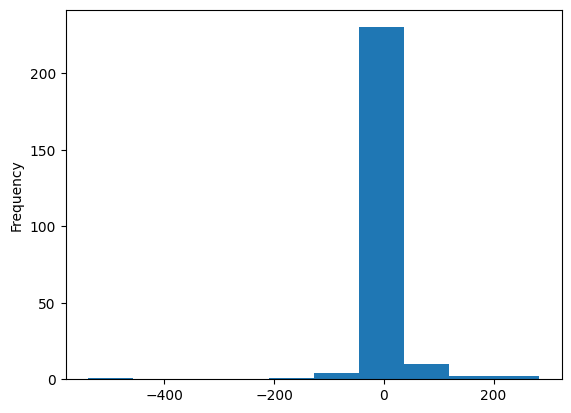

In [1005]:
df["berkat"].plot(kind = "hist")

In [1006]:
df.corrwith(df["berkat"]).sort_values()

ICE allocations      -0.144289
ICE normal returns   -0.144289
ICE                  -0.144289
ICE position         -0.144289
GIS daily returns    -0.143908
                        ...   
K position            0.153443
K                     0.153443
K allocations         0.153443
dividedSharpAndVol    0.793648
berkat                1.000000
Length: 312, dtype: float64

<AxesSubplot:xlabel='Date'>

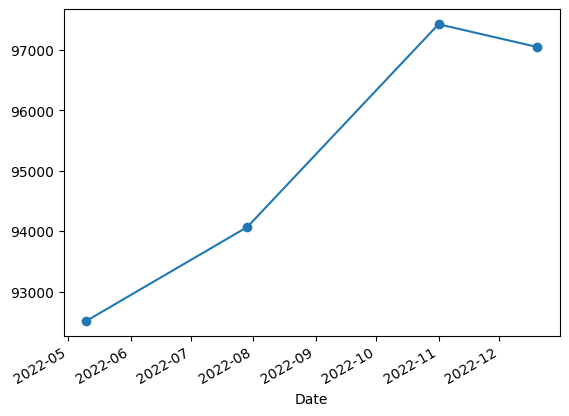

In [1013]:
df[df["berkat"] > 100]["total position"].plot(marker= "o")

In [1014]:
df[df["berkat"] > 200]

,GILD,GIS,GL,GLW,GM,GNRC,GOOG,GOOGL,GPC,GPN,...,expectedDailReturn,portDailyReturn,dailySTD,daily Sharp,portfolioVolumeChange,volumeSTD,volSharp,absSharpAndVol,dividedSharpAndVol,berkat
Date,,,,,,,,,,,,,,,,,,,,,
2022-05-10,59.272621,69.856262,96.585800,34.870552,38.436619,223.330002,114.584503,114.394997,127.991432,117.873177,...,0.043129,0.000185,0.018222,0.010152,0.002959,0.228890,0.012928,0.002775,0.785327,282.981192
2022-11-01,77.945152,79.290741,113.767982,32.033844,39.171421,114.699997,90.500000,90.470001,177.379929,113.094292,...,0.822804,0.003351,0.027361,0.122486,0.070186,0.592751,0.118407,0.004079,1.034448,253.613177


In [1015]:
df.loc["2022-09-02"][200:]

HII allocations        0.032697
HLT allocations        0.022659
HOLX allocations       0.024192
HON allocations        0.009453
HPE allocations        0.012734
                        ...    
volumeSTD              0.326401
volSharp              -0.018589
absSharpAndVol         0.803539
dividedSharpAndVol    44.225684
berkat                55.038627
Name: 2022-09-02 00:00:00, Length: 112, dtype: float64